Select GPU runtime!!!

In [1]:
!pip list | grep cupy

cupy-cuda101                  9.1.0              


In [2]:
!git clone https://github.com/geyuying/PF-AFN.git

Cloning into 'PF-AFN'...
remote: Enumerating objects: 383, done.
remote: Counting objects: 100% (186/186), done.
remote: Compressing objects: 100% (140/140), done.
remote: Total 383 (delta 74), reused 118 (delta 35), pack-reused 197
Receiving objects: 100% (383/383), 4.49 MiB | 5.56 MiB/s, done.
Resolving deltas: 100% (129/129), done.


In [3]:
%cd PF-AFN

/content/PF-AFN


In [4]:
%cd PF-AFN_test

/content/PF-AFN/PF-AFN_test


In [5]:
!mv models/correlation/correlation.py models/correlation/correlation_org
!sed -e 's/cupy.util.memoize/cupy.memoize/g' models/correlation/correlation_org > models/correlation/correlation.py

In [6]:
import gdown
gdown.download('https://drive.google.com/uc?id=1_a0AiN8Y_d_9TNDhHIcRlERz3zptyYWV',
    'checkpoints.zip', quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1_a0AiN8Y_d_9TNDhHIcRlERz3zptyYWV
To: /content/PF-AFN/PF-AFN_test/checkpoints.zip
271MB [00:01, 239MB/s]


'checkpoints.zip'

In [7]:
!unzip checkpoints.zip

Archive:  checkpoints.zip
  inflating: checkpoints/.DS_Store   
  inflating: __MACOSX/checkpoints/._.DS_Store  
   creating: checkpoints/PFAFN/
  inflating: checkpoints/PFAFN/.DS_Store  
  inflating: __MACOSX/checkpoints/PFAFN/._.DS_Store  
  inflating: checkpoints/PFAFN/gen_model_final.pth  
  inflating: checkpoints/PFAFN/warp_model_final.pth  


In [8]:
!rm -rf results/demo/PFAFN/*.jpg

In [9]:
!python test.py --name demo --resize_or_crop None --batchSize 1 --gpu_ids 0

------------ Options -------------
batchSize: 1
data_type: 32
dataroot: dataset/
display_winsize: 512
fineSize: 512
gen_checkpoint: checkpoints/PFAFN/gen_model_final.pth
gpu_ids: [0]
input_nc: 3
isTrain: False
loadSize: 512
max_dataset_size: inf
nThreads: 1
name: demo
no_flip: False
norm: instance
output_nc: 3
phase: test
resize_or_crop: None
serial_batches: False
tf_log: False
use_dropout: False
verbose: False
warp_checkpoint: checkpoints/PFAFN/warp_model_final.pth
-------------- End ----------------
CustomDatasetDataLoader
dataset [AlignedDataset] was created
6
AFWM(
  (image_features): FeatureEncoder(
    (encoders): ModuleList(
      (0): Sequential(
        (0): DownSample(
          (block): Sequential(
            (0): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (1): ReLU(inplace=True)
            (2): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
          )
        )
        (1): ResBlock(
          

In [10]:
!cat demo.txt

000066_0.jpg 017575_1.jpg
016962_0.jpg 003434_1.jpg
004912_0.jpg 014396_1.jpg
005510_0.jpg 006026_1.jpg
014834_0.jpg 019119_1.jpg
015794_0.jpg 010567_1.jpg

In [11]:
from google.colab.patches import cv2_imshow
import cv2

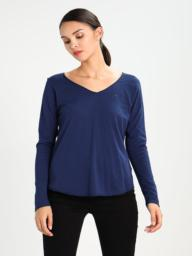

In [12]:
cv2_imshow(cv2.imread('dataset/test_img/000066_0.jpg', cv2.IMREAD_UNCHANGED))

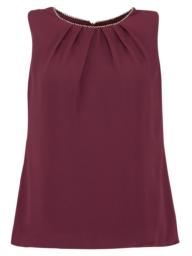

In [13]:
cv2_imshow(cv2.imread('dataset/test_clothes/017575_1.jpg', cv2.IMREAD_UNCHANGED))

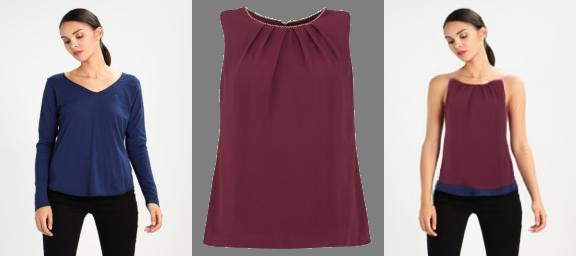

In [14]:
cv2_imshow(cv2.imread('results/demo/PFAFN/0.jpg', cv2.IMREAD_UNCHANGED))